# this a ai modle traning for recogineztingh the numbers from handwritings. 


In [1]:


import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split



In [2]:
# Load the MNIST dataset
digits = datasets.load_digits()

# Flatten the images into a 1D array
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42
)

# Create a Support Vector Classifier (SVC) model
clf = svm.SVC(gamma=0.001)

# Train the model
clf.fit(X_train, y_train)

# Predict the labels for the test set
predicted = clf.predict(X_test)

# Print the classification report
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8685 - loss: 0.4474 - val_accuracy: 0.9776 - val_loss: 0.0744
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9824 - loss: 0.0563 - val_accuracy: 0.9827 - val_loss: 0.0599
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 0.9846 - val_loss: 0.0499
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9859 - val_loss: 0.0464
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9883 - val_loss: 0.0405
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9862 - loss: 0.0391
Test accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


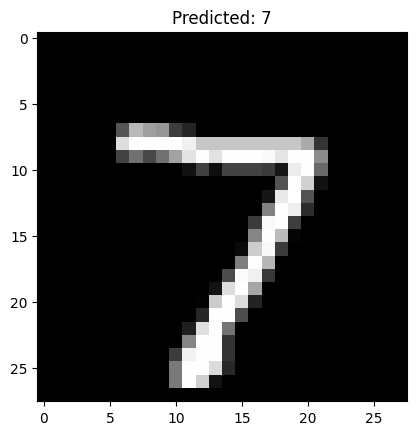

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

# Reshape data to add channel dimension (for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Step 7: Make predictions
def predict_number(image):
    image = image.reshape(1, 28, 28, 1)  # Reshape to match model input
    prediction = np.argmax(model.predict(image))
    return prediction

# Visualize and predict a sample image
sample_image = x_test[0]
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predict_number(sample_image)}")
plt.show()


# notice the input need to be a image and I want a easiler way to input throught the prediction model,
# so import a drawing interface is the first idea 

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

# Reshape data to add channel dimension (for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model (uncomment to train the model)
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Save the trained model to a file
model.save('my_model.h5')  # Save the model after training

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

####################################

# Load your trained model
model = load_model('my_model.h5')  # Replace with your saved model's path

# Create a blank canvas and callback function for drawing
canvas = np.zeros((400, 400), dtype="uint8")  # Black canvas
drawing = False  # Flag to indicate drawing state

def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:  # Start drawing
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:  # Draw
        cv2.circle(canvas, (x, y), 8, (255, 255, 255), -1)  # Draw white circles
    elif event == cv2.EVENT_LBUTTONUP:  # Stop drawing
        drawing = False

# Set up OpenCV window and callback
cv2.namedWindow("Draw a Digit")
cv2.setMouseCallback("Draw a Digit", draw)

while True:
    cv2.imshow("Draw a Digit", canvas)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("c"):  # Clear the canvas
        canvas = np.zeros((400, 400), dtype="uint8")
    elif key == ord("q"):  # Quit the application
        break
    elif key == ord("p"):  # Predict the digit
        # Preprocess the canvas for prediction
        resized = cv2.resize(canvas, (28, 28))  # Resize to 28x28
        normalized = normalize(resized, axis=-1)  # Normalize pixel values
        reshaped = normalized.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

        # Predict the digit
        prediction = np.argmax(model.predict(reshaped))
        print(f"Predicted Digit: {prediction}")

cv2.destroyAllWindows()


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8734 - loss: 0.4298 - val_accuracy: 0.9795 - val_loss: 0.0661
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9806 - loss: 0.0616 - val_accuracy: 0.9828 - val_loss: 0.0559
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9876 - loss: 0.0417 - val_accuracy: 0.9883 - val_loss: 0.0421
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9876 - val_loss: 0.0439
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9936 - loss: 0.0216 - val_accuracy: 0.9873 - val_loss: 0.0431


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0430


Test accuracy: 0.99


2024-12-29 18:13:07.957 Python[7585:6646892] +[IMKClient subclass]: chose IMKClient_Legacy
2024-12-29 18:13:07.957 Python[7585:6646892] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Digit: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Digit: 9


KeyboardInterrupt: 